# SDS322E FINAL PROJECT - EXPLORATORY 

In [1]:
!pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

You are using pip version 19.0, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### Step 1: Clean data

In [2]:
#Remove NA
df.isnull().sum()
#Remove noise - by rounding numbers 
df[['Age','FAF', 'FCVC', 'TUE', 'CH2O', 'NCP']] = round(df[['Age','FAF', 'FCVC', 'TUE', 'CH2O', 'NCP']],0)

##### Step 2: Describe data 

In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Step 3: Find correlation 

In [4]:
df['BMI'] = df['Weight']/(df['Height']**2)
df = df.drop(['Height','Weight'],axis=1)
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


<AxesSubplot:>

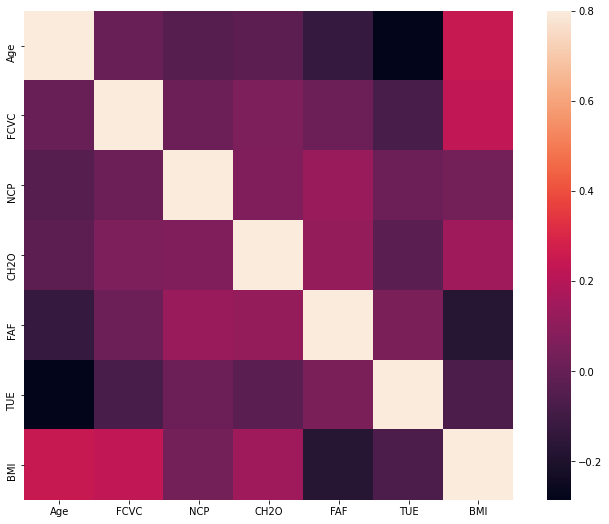

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# SDS322E FINAL PROJECT - ANALYSIS

In [6]:
df['BMI'] = df['Weight']/(df['Height']**2)
import statsmodels.formula.api as smf
df.head()

KeyError: 'Weight'

### BMI vs. Family History 

In [ ]:
lm = lm = smf.ols('BMI ~ C(family_history_with_overweight)', data = df).fit()
lm.summary() 

### BMI vs. Frequency consumption of high-calories food

In [ ]:
lm = lm = smf.ols('BMI ~ C(FAVC)', data = df).fit()
lm.summary()

### BMI VS. Frequency of physical activities 

In [ ]:
lm = lm = smf.ols('BMI ~ C(FAF)', data = df).fit()
lm.summary()

### Added other variables 

In [ ]:
lm = lm = smf.ols('BMI ~ C(family_history_with_overweight) + C(FAVC) + C(FAF)', data = df).fit()
lm.summary()

## -------TEST MODEL STARTS HERE!!! -------

##### Change categorical variables into numerical variables 

In [ ]:
df['Gender']=df['Gender'].apply(lambda x:1 if x == 'Female' else 0)
df['family_history_with_overweight']=df['family_history_with_overweight'].apply(lambda x:1 if x == 'yes' else 0)
df['FAVC']=df['FAVC'].apply(lambda x:1 if x == 'yes' else 0)
df['SMOKE']=df['SMOKE'].apply(lambda x:1 if x == 'yes' else 0)
df['SCC']=df['SCC'].apply(lambda x:1 if x == 'yes' else 0)
df['CAEC'] = pd.factorize(df['CAEC'])[0]
df['CALC'] = pd.factorize(df['CALC'])[0]
df['MTRANS'] = pd.factorize(df['MTRANS'])[0]

df.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [ ]:
# define data, X is the independent variables, Y is the dependent variable 
df1 = df.drop(['Height','Weight','NObeyesdad','BMI'],axis=1)
X = df1
y = df['NObeyesdad']
acc=[]

In [ ]:
#Split the trainning sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 1. SVM Classifier

In [ ]:
###SVM Classifer 
from sklearn.datasets import make_classification
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

###svm evaluation 
from sklearn.metrics import accuracy_score

# make prediction
y_pred = svm_model.predict(X_test) 

# compute accuracy and print it
accuracy1 = accuracy_score(y_test, y_pred) 
acc.append(accuracy1)
print("Accuracy : ", accuracy1)

## 2. kNN

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
###knn classifer 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

###knn evaluation 
y_pred1 = knn.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred1) 
acc.append(accuracy2)
print("Accuracy : ", accuracy2)

###knn visualization
#plt.scatter(X_train[:,0],X_train[:,1], c=y_)

## 3. Decision Tree

In [ ]:
###decision tree classifer 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

###decision tree evaluation
y_pred2 = clf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred2) 
acc.append(accuracy3)
print("Accuracy : ", accuracy3)

## 4. Naive bayes

In [ ]:
###naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)

###decision tree evaluation
y_pred3 = gnb.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred3) 
acc.append(accuracy4)
print("Accuracy : ", accuracy4)


## 5. Random Forest

In [ ]:
###random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc = rfc.fit(X_train,y_train)
y_pred4 = rfc.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred4) 
acc.append(accuracy5)
print("Accuracy : ", accuracy5)

In [ ]:
###plot accuracy 
classifiers = ['SVM', 'KNN', 'Decision Tree','Navie Bayes','Random Forest']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classifiers,acc)
plt.show()

------ BY CATEGORIES -----------

In [ ]:
df["NObeyesdad"].value_counts()

In [ ]:
Female = df[df['Gender']==1]
Female["NObeyesdad"].value_counts()

In [ ]:
Male = df[df['Gender']==0]
Male["NObeyesdad"].value_counts()

In [ ]:
blue_bar = (2,156,103,141,145,173,323)
orange_bar = (295,195,187,146,145,99,1)


# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
ind = ["Obesity_Type_II", "Obesity_Type_I","Overweight_Level_II ","Normal_Weight","Overweight_Level_I","Insufficient_Weight","Obesity_Type_III"]
plt.bar(ind, blue_bar , width, label='Female')
plt.bar(ind + width, orange_bar, width, label='Male')

plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Distribution of Obesity Level by Gender')

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()